In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
car=pd.read_csv(r"D:\ASSIGNMENTS/A6 Multiple Regression/ToyotaCorolla (1).csv",encoding='latin1')
car.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [8]:
cars=pd.concat([car.iloc[:,2:4],car.iloc[:,6:7],car.iloc[:,8:9],car.iloc[:,12:14],car.iloc[:,15:18]],axis=1)

In [9]:
cars.isna().sum()


Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [10]:
cars.head(2)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [11]:
car1=cars.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'TAX'},axis=1)
car1.head(2)

,Price,Age,KM,HP,CC,Doors,Gears,TAX,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [12]:
car1[car1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,TAX,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [13]:
car2=car1.drop_duplicates().reset_index(drop=True)
car2

,Price,Age,KM,HP,CC,Doors,Gears,TAX,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [14]:
car2.corr()

,Price,Age,KM,HP,CC,Doors,Gears,TAX,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
TAX,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


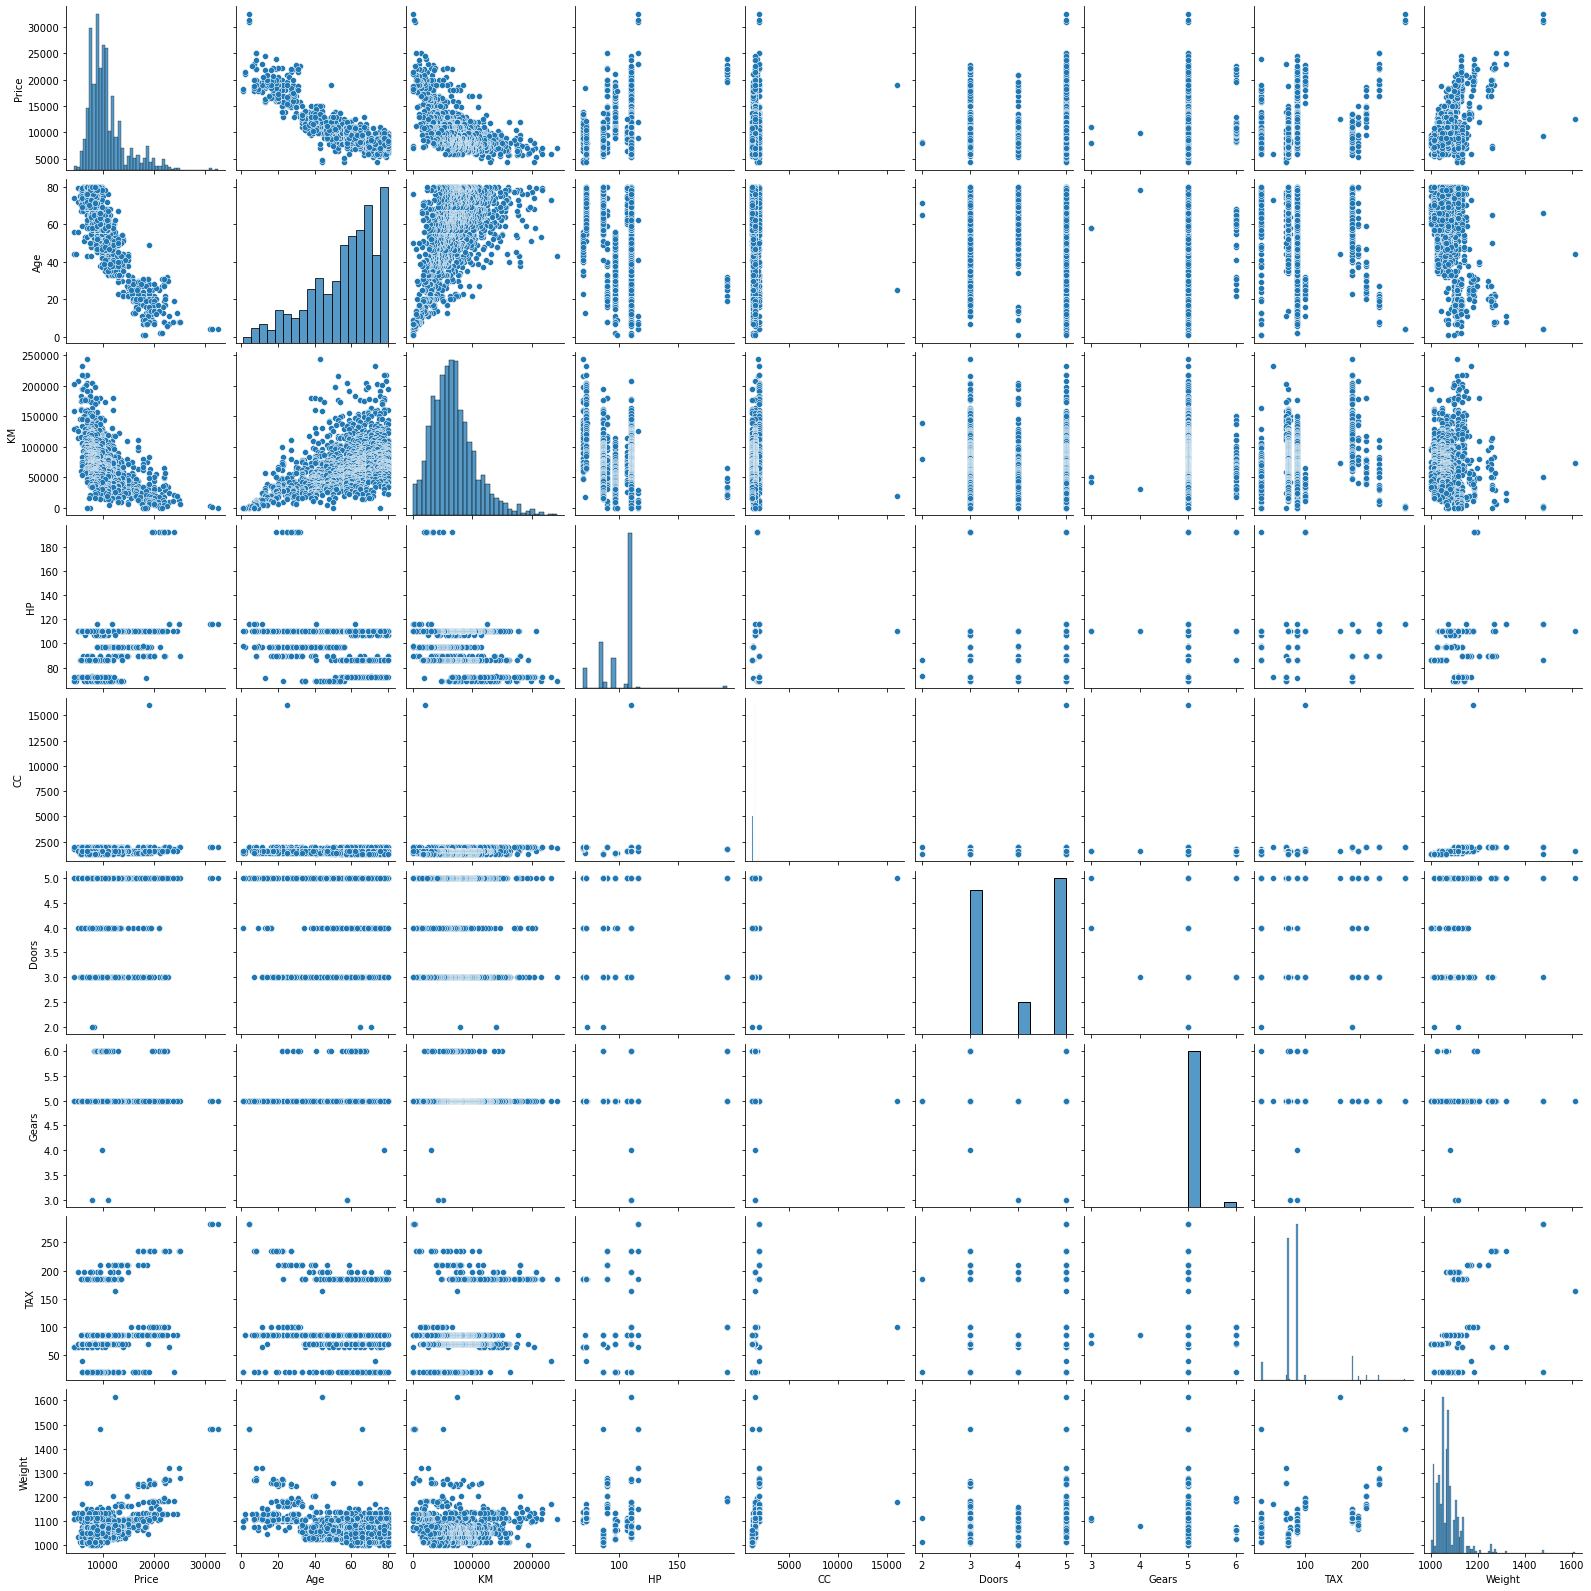

In [15]:
sns.pairplot(car2)

In [16]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+TAX+Weight',data=car2).fit()

In [17]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
TAX             3.858805
Weight         16.855470
dtype: float64

In [18]:
print(model.tvalues,'\n',np.round(model.pvalues,4))

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
TAX           2.944198
Weight       15.760663
dtype: float64 
 Intercept    0.0001
Age          0.0000
KM           0.0000
HP           0.0000
CC           0.1882
Doors        0.9816
Gears        0.0025
TAX          0.0033
Weight       0.0000
dtype: float64


In [19]:
model.rsquared,model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [20]:
ml_c=smf.ols("Price~CC",data=car2).fit()
ml_c.pvalues

Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64

In [21]:
ml_d=smf.ols("Price~Doors",data=car2).fit()
ml_d.pvalues

Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64

In [22]:
ml_cd=smf.ols("Price~CC+Doors",data=car2).fit()
ml_cd.pvalues

Intercept    1.580945e-35
CC           2.101878e-05
Doors        2.109558e-11
dtype: float64

In [23]:
rsq_c=smf.ols("CC~Doors+Age+KM+HP+TAX+Weight+Gears",data=car2).fit().rsquared
vif_c=1/(1-rsq_c)
vif_c

1.1634703645940854

In [24]:
rsq_d=smf.ols("Doors~CC+Age+KM+HP+TAX+Weight+Gears",data=car2).fit().rsquared
vif_d=1/(1-rsq_d)
vif_d

1.155889865814207

In [25]:
rsq_a=smf.ols("Age~Doors+CC+KM+HP+TAX+Weight+Gears",data=car2).fit().rsquared
vif_a=1/(1-rsq_a)
vif_a

1.8762358497682892

In [26]:
rsq_k=smf.ols("KM~Doors+CC+Age+HP+TAX+Weight+Gears",data=car2).fit().rsquared
vif_k=1/(1-rsq_k)
vif_k

1.75717802398104

In [27]:
rsq_h=smf.ols("HP~Doors+CC+KM+Age+TAX+Weight+Gears",data=car2).fit().rsquared
vif_h=1/(1-rsq_h)
vif_h

1.419180108718214

In [28]:
rsq_t=smf.ols("TAX~Doors+CC+KM+HP+Age+Weight+Gears",data=car2).fit().rsquared
vif_t=1/(1-rsq_t)
vif_t

2.295374508985715

In [29]:
rsq_w=smf.ols("Weight~Doors+CC+KM+HP+TAX+Age+Gears",data=car2).fit().rsquared
vif_w=1/(1-rsq_w)
vif_w

2.4871800071791856

In [30]:
rsq_g=smf.ols("Gears~Doors+CC+KM+HP+TAX+Weight+Age",data=car2).fit().rsquared
vif_g=1/(1-rsq_g)
vif_g

1.098842908163115

In [33]:
df={'Variables':['CC','Doors','Age','KM','HP','TAX','Weight','Gears'],
    'VIF':[vif_c,vif_d,vif_a,vif_k,vif_h,vif_t,vif_w,vif_g]}
vif=pd.DataFrame(df)
vif

,Variables,VIF
0,CC,1.163470
1,Doors,1.155890
2,Age,1.876236
3,KM,1.757178
4,HP,1.419180
5,TAX,2.295375
6,Weight,2.487180
7,Gears,1.098843


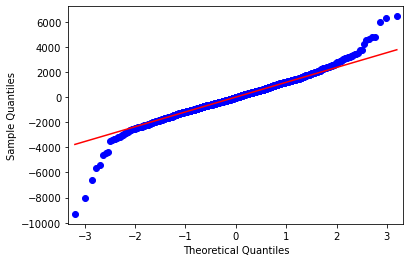

In [34]:
qqplot=sm.qqplot(model.resid,line='q')

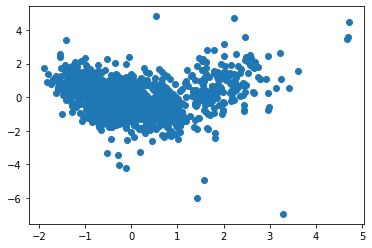

In [41]:
def standard_values(vals):
    return(vals-vals.mean())/vals.std()
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))

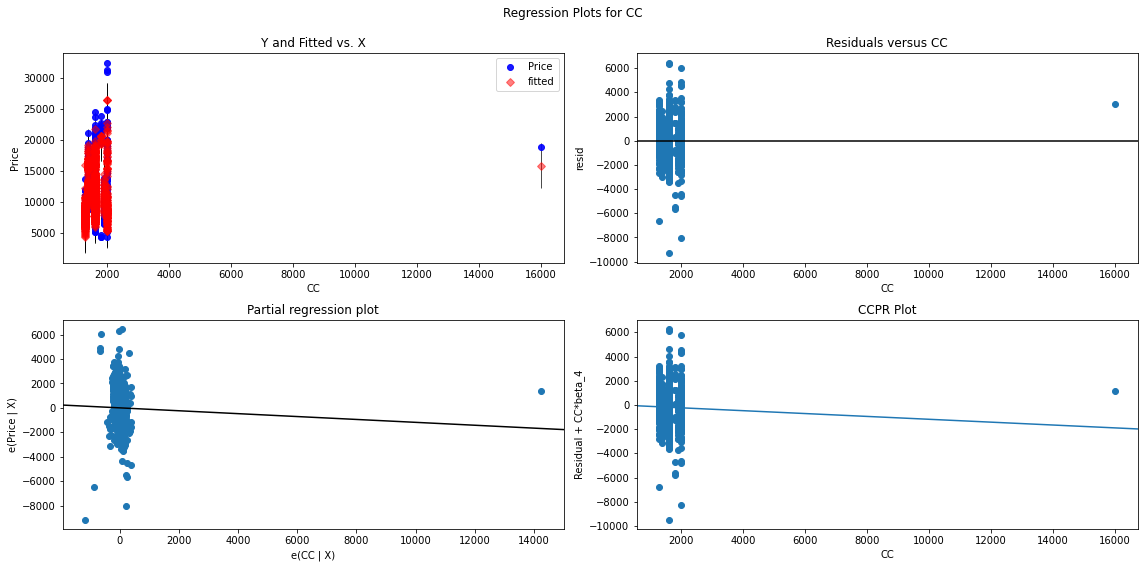

In [42]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,'CC',fig=fig)


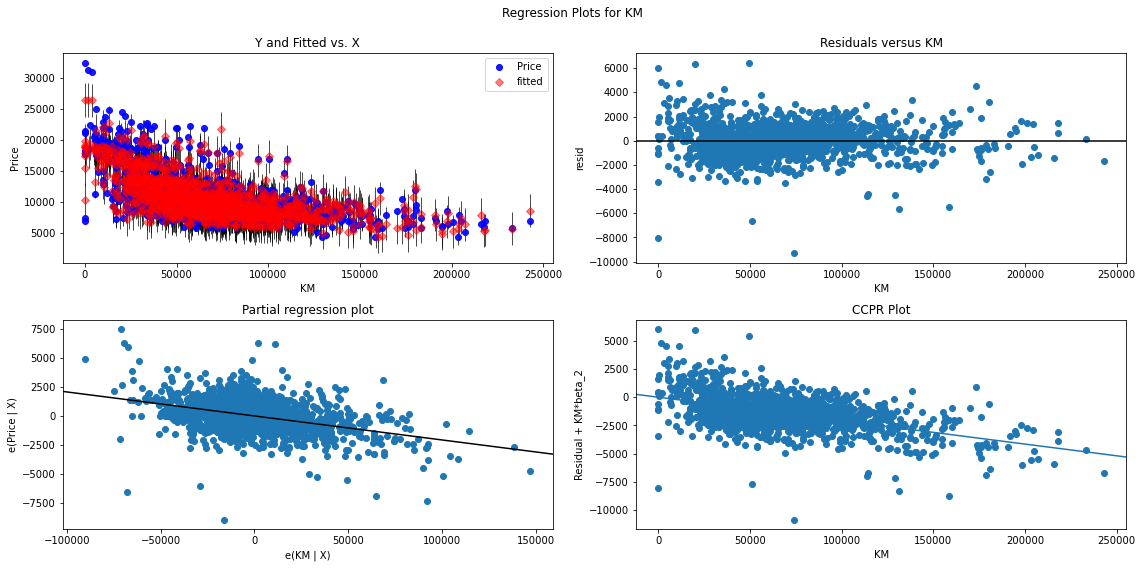

In [43]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)


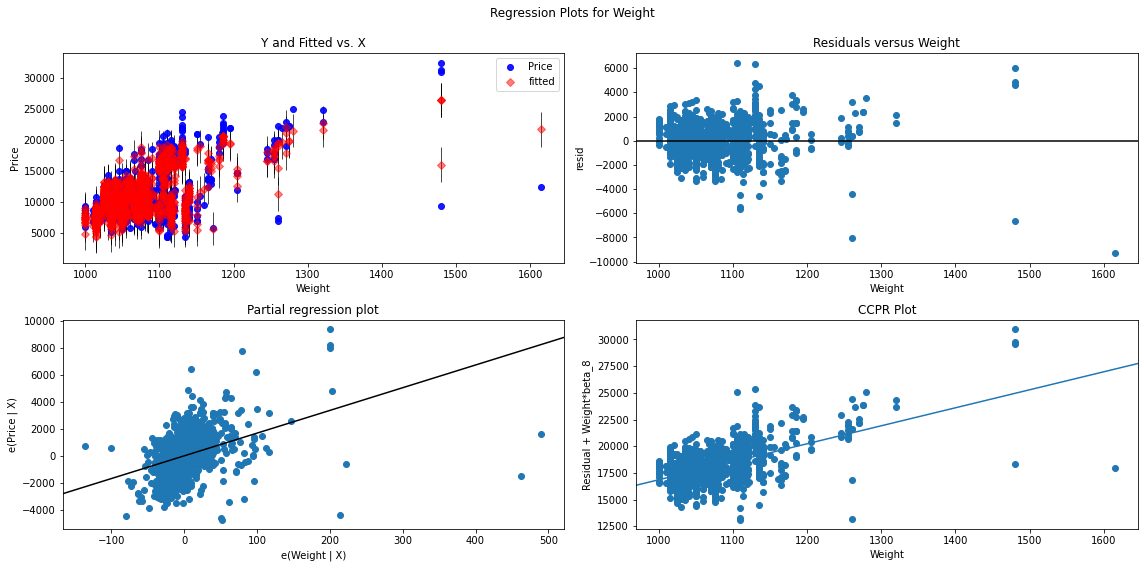

In [44]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)


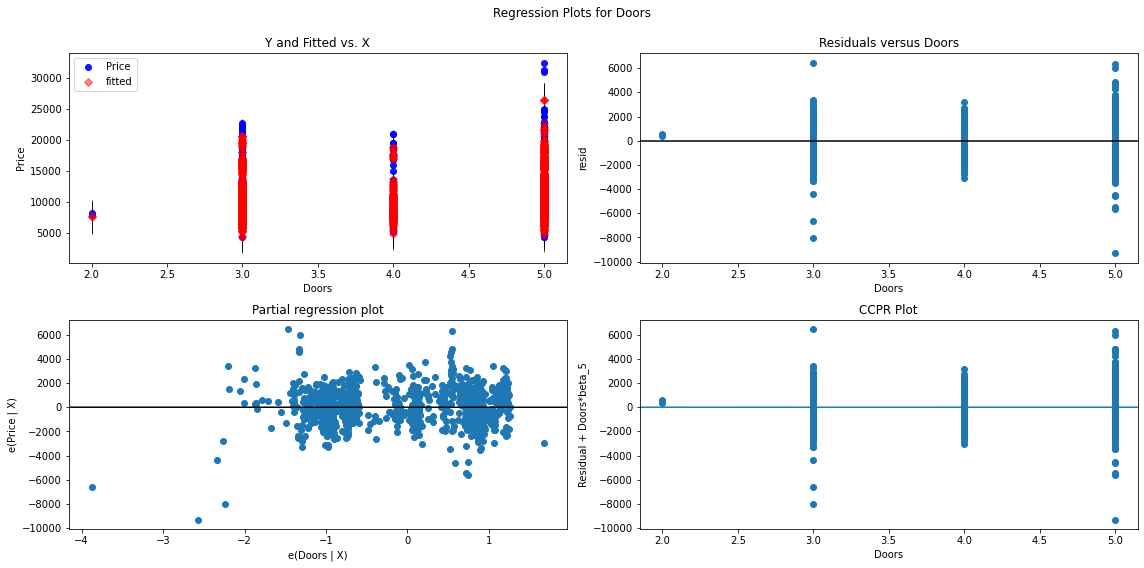

In [45]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)


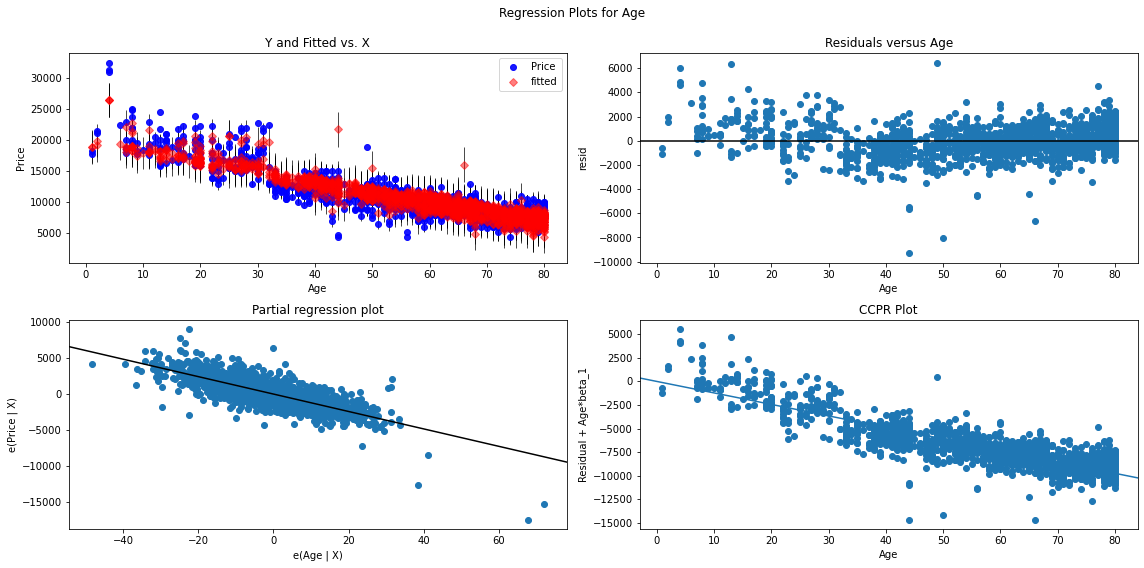

In [46]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,'Age',fig=fig)


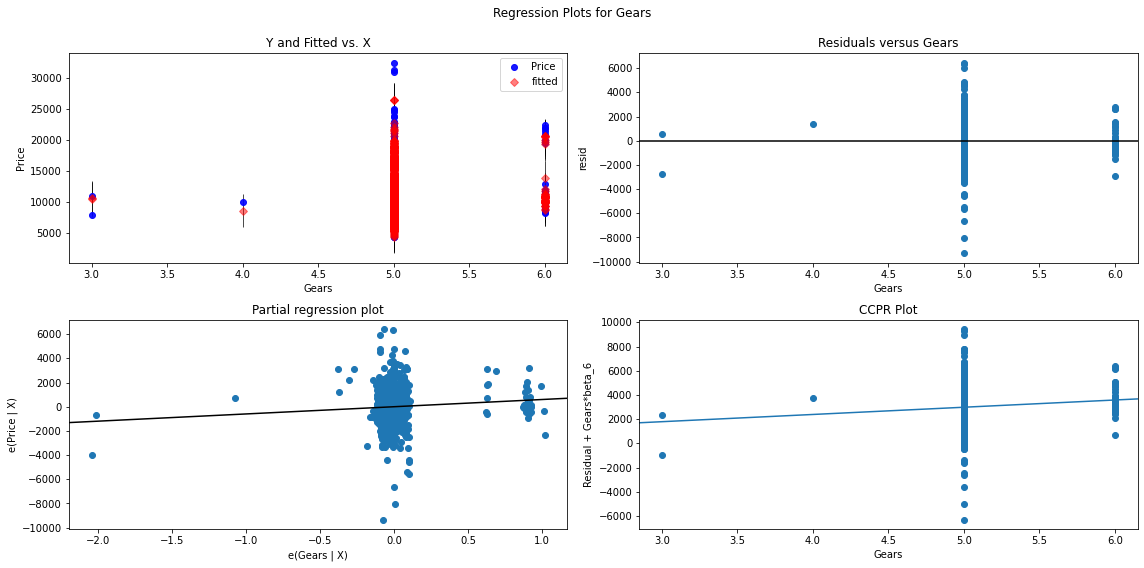

In [47]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)


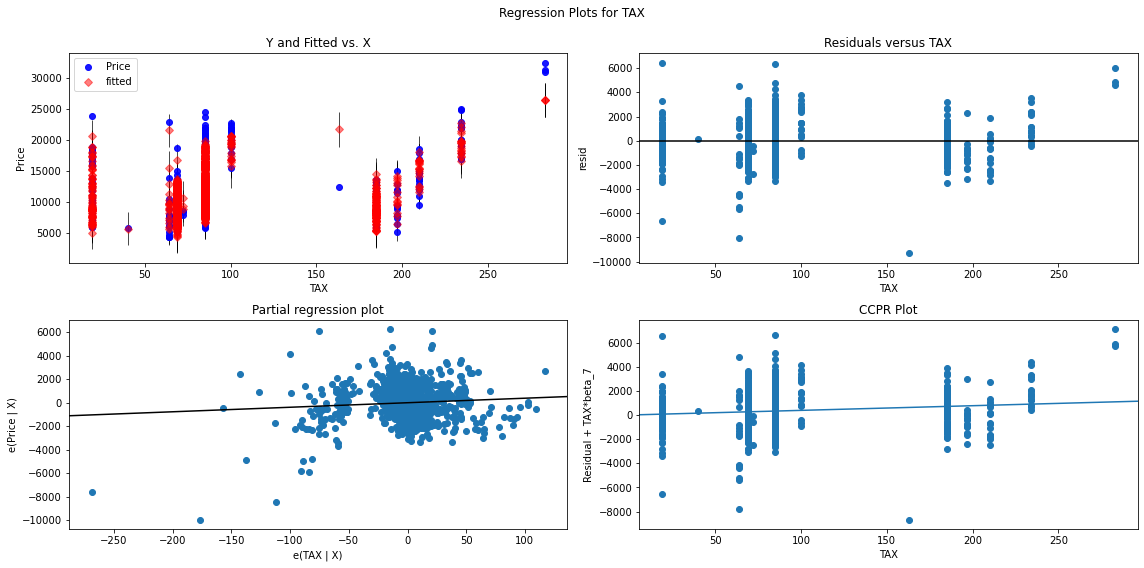

In [48]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,'TAX',fig=fig)


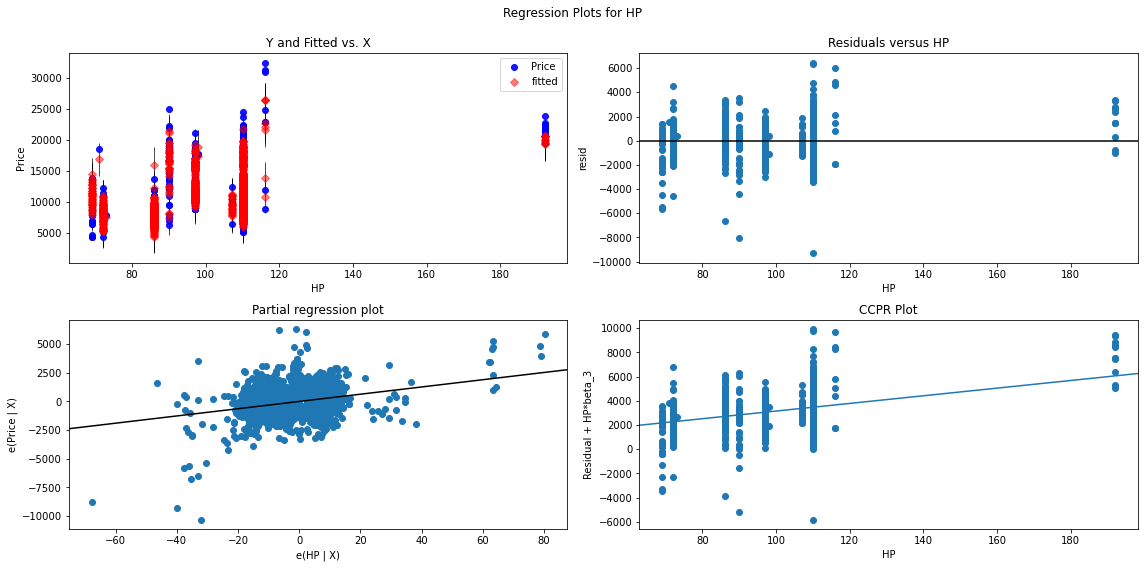

In [50]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)


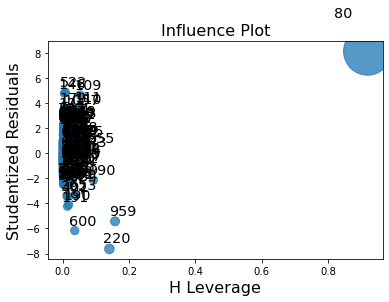

In [52]:
influence_plot(model)
plt.show()

In [55]:
car2[car2.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,TAX,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [63]:
car3=car2.drop(car2.index[[80]],axis=0).reset_index(drop=True)

In [73]:
car3.head(2)

,Price,Age,KM,HP,CC,Doors,Gears,TAX,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


In [79]:
final_ml=smf.ols("Price~CC+HP+KM+Weight+Age+Gears+TAX",data=car3).fit()
final_ml.rsquared,final_ml.aic

(0.8680741306155818, 24667.8233300342)

In [80]:
final_ml=smf.ols("Price~HP+KM+Weight+Age+Gears+TAX+Doors",data=car3).fit()
final_ml.rsquared,final_ml.aic

(0.8619510191654682, 24732.881596284984)

In [77]:
new_data=pd.DataFrame({'Age':20,'KM':5000,'HP':80,'CC':2500,'Doors':4,'Gears':4,'TAX':250,'Weight':1200},index=[1])
final_model.predict(new_data)

1    17852.067651
dtype: float64

In [86]:
pred_y=final_model.predict(car3)
pred_y

0       16799.620754
1       16258.994349
2       16787.770624
3       16413.270472
4       16207.119285
            ...     
1429     8785.182002
1430     8286.306846
1431     8449.380707
1432     8573.205980
1433    10402.403683
Length: 1434, dtype: float64